In [91]:
import numpy as np
import pandas as pd
from abc import ABC
from abc import abstractmethod
import sys
sys.path.append("..")
import Essentials
from numpy.linalg import svd

In [92]:
data = np.load("Data_First.npz",allow_pickle=True)

In [93]:
x1 = data['X_test_1']
x2 = data['X_train_1']

y1 = data['Y_test_1']
y2 = data['Y_train_1']

In [94]:
timestamp1 = y1[:, 1]
timestamp2 = y2[:, 1]

y1 = y1[:, 0].reshape(len(y1), 1)
y1 = y1.astype(np.float64)
y2 = y2[:, 0].reshape(len(y2), 1)
y2 = y2.astype(np.float64)

C:\Users\misha\AppData\Local\Temp\ipykernel_4548\3146428066.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y1 = y1.astype(np.float64)
C:\Users\misha\AppData\Local\Temp\ipykernel_4548\3146428066.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y2 = y2.astype(np.float64)


In [95]:
y1.shape

(74, 1)

In [97]:
y1.shape

(74, 1)

In [98]:
import matplotlib.pyplot as plt

class PLSSVD(Essentials.SoftSensor):
    def __init__(self, X_train: np.ndarray, Y_train: np.ndarray):
        super().__init__('Test')
        self.n_components = 2
        self.coefficients = None
        self.intercept = None
        self.train(X_train, Y_train)  # Вызов метода обучения прямо из конструктора

    def prepocessing(self, X):
        if self.means is None or self.stds is None:
            raise RuntimeError("Model has not been trained yet.")
        return (X - self.means) / self.stds

    def postprocessing(self, Y_pred):
        return Y_pred

    def evaluate_model(self, X):
        X_centered_scaled = self.prepocessing(X)
        return np.dot(X_centered_scaled, self.coefficients) + self.intercept

    def train(self, X, Y):
        self.means = np.mean(X, axis=0)
        self.stds = np.std(X, axis=0)
        X_centered_scaled = self.prepocessing(X)

        Y_mean = np.mean(Y, axis=0)
        Y_centered = Y - Y_mean
        
        U, s, V = np.linalg.svd(X_centered_scaled, full_matrices=False)
        T = U[:, :self.n_components]
        self.weights = np.dot(T.T, Y_centered)

        B = V[:self.n_components, :].T / s[:self.n_components]
        self.coefficients = np.dot(B, self.weights)
        self.coefficients = self.coefficients.ravel()
        self.intercept = Y_mean - np.dot(self.means / self.stds, self.coefficients)
        
        self.set_model((self.coefficients, self.intercept))
    def plot_regression_line(self, X, Y):
        Y_pred = self.evaluate_model(X)
        plt.scatter(X[:, 0], Y, label='Actual Data')
        plt.scatter(X[:, 0], Y_pred, label='Predicted Data', color='red')
        plt.xlabel('First Feature')
        plt.ylabel('Target')
        plt.title('PLSSVD Regression Line')
        plt.legend()
        plt.show()
        
    def __str__(self):
        return f"Intercept: {self.intercept}, Cofficients:{self.coefficients}"

In [99]:
Test_sensor_1 = PLSSVD(x2, y2)

In [100]:
print(Test_sensor_1)

Intercept: [-26.59375391], Cofficients:[ 8.07516832e-02  6.66891450e-03 -5.33835789e-02  5.85839761e-02
 -2.95392312e-02  8.04751472e-02 -9.46092342e-03  3.54263830e-02
  6.10212147e-02  3.87335809e-02  6.80251788e-02  6.10212147e-02
 -7.28282809e-03  6.65801185e-02  6.69012788e-02  8.70782214e-02
  7.68153813e-02  4.75059848e-02  5.86705757e-02 -8.51085416e-02
 -2.28794291e-16  2.21074543e-02  6.26303218e-03 -2.65831973e-02
  6.75040909e-02  7.82833869e-02  6.03831343e-02  4.57886557e-02
 -6.22842952e-02  7.18756928e-02 -2.27144624e-02  4.75710413e-02
 -8.95565363e-03  9.57080724e-03  8.51336514e-02  8.14907601e-02
  8.58230802e-04  4.58823985e-02 -1.64875712e-02  3.49002757e-02
  1.22097891e-02  1.44411284e-02  3.91832013e-02  4.52792969e-02
  7.08786278e-02  5.23033841e-02  5.83731872e-02  6.69012788e-02
  5.06232231e-02  5.29331742e-02  8.49363175e-02  8.30211989e-02
  5.42946608e-02  8.51743156e-02  4.67423444e-02  8.52278848e-02
  4.74529304e-02  8.61549553e-02  5.19498384e-02 -9

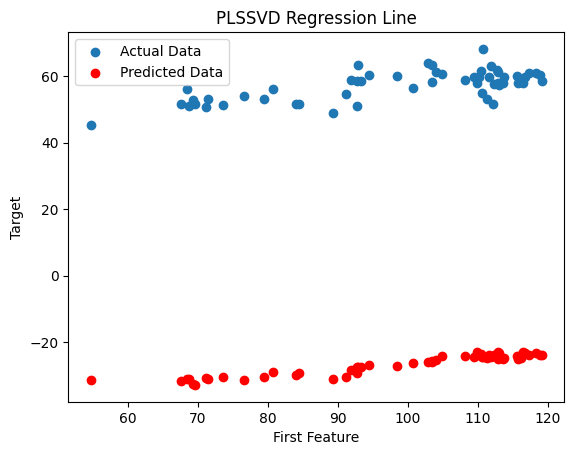

In [101]:
Test_sensor_1.plot_regression_line(x2,y2)